## IFT870 - TP1 
### gibg2501 - leba3207
#### 7 février 2020

In [52]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import scipy.spatial.distance as sdist

import numpy as np
import scipy as sp
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell

# removes maximum number of columns & rows for display
pd.options.display.max_columns = 7
pd.options.display.max_rows = 10

# show every output in every cell
InteractiveShell.ast_node_interactivity = "all" #    'all', 'last', 'last_expr', 'none', 'last_expr_or_assign'

# Loads the data in a data frame
tp1_data_file = 'TP1_data.csv'
tp1_data = pd.read_csv(tp1_data_file, header=0, index_col=0)
tp1_data
headers = tp1_data.columns

# Create data frames for each classe
condition0 = tp1_data['classe'] == 0
condition1 = tp1_data['classe'] == 1
condition2 = tp1_data['classe'] == 2

tp1_data_classe_0 = tp1_data.loc[condition0 , 'attribut1':'attribut4']
tp1_data_classe_1 = tp1_data.loc[condition1 , 'attribut1':'attribut4']
tp1_data_classe_2 = tp1_data.loc[condition2 , 'attribut1':'attribut4']

,attribut1,attribut2,attribut3,attribut4,classe
id1,38.0,33.0,10.0,19.0,0
id2,38.2,23.4,17.0,16.6,0
id3,33.0,24.0,19.0,23.0,0
id4,31.0,21.0,29.0,16.0,0
id5,37.0,27.0,24.0,12.0,0
...,...,...,...,...,...
id55,68.5,19.2,0.3,12.0,2
id56,59.5,21.4,0.2,13.5,2
id57,65.8,27.0,0.2,6.7,2
id58,66.1,19.6,0.7,10.8,2


Description des données statistiques de base du jeux de données

In [53]:
tp1_data.describe()

,attribut1,attribut2,attribut3,attribut4,classe
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,49.793220,23.486441,9.594915,14.557627,0.915254
std,10.490782,3.531995,8.174992,4.057994,0.815542
min,28.700000,16.500000,0.000000,3.700000,0.000000
25%,40.850000,21.050000,2.400000,12.000000,0.000000
50%,49.000000,23.300000,9.000000,15.100000,1.000000
75%,59.200000,25.100000,13.000000,16.950000,2.000000
max,68.500000,33.000000,29.100000,23.000000,2.000000


Affichage des attributs du jeux de données paire à paire et quantification de la correlation à l'aide de la méthode de Pearson $$\left(\frac{cov(X,Y)}{\sigma_X\sigma_Y} \right)$$

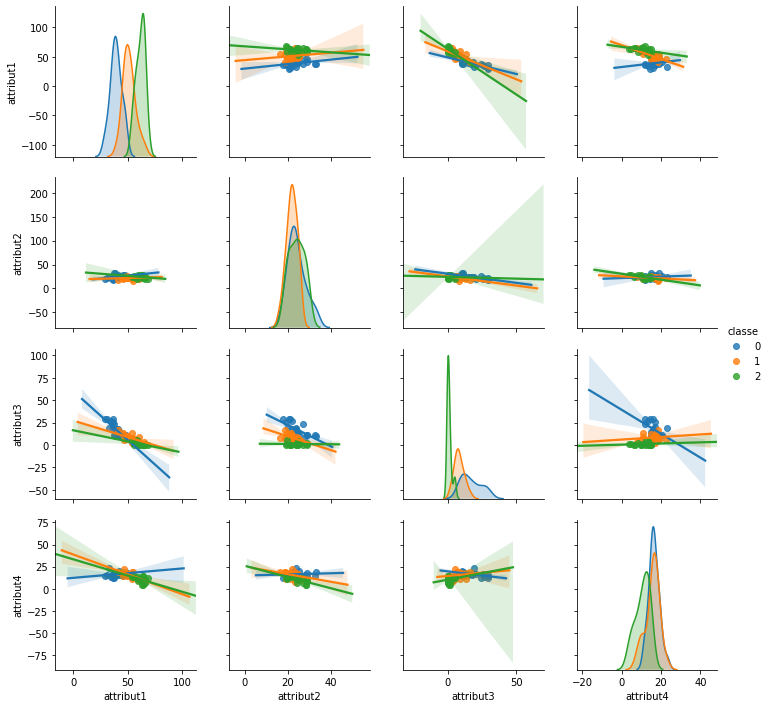

In [54]:
%matplotlib inline
sns.pairplot(tp1_data, vars=['attribut1', 'attribut2', 'attribut3', 'attribut4'],  hue='classe', kind='reg')



Corrélation inter-attributs pour la classe 0 

In [55]:
tp1_data_classe_0.corr(method='pearson')

,attribut1,attribut2,attribut3,attribut4
attribut1,1.000000,0.302290,-0.784024,0.205335
attribut2,0.302290,1.000000,-0.671647,0.097789
attribut3,-0.784024,-0.671647,1.000000,-0.496368
attribut4,0.205335,0.097789,-0.496368,1.000000


Corrélation inter-attributs pour la classe 1

In [56]:
tp1_data_classe_1.corr(method='pearson')

,attribut1,attribut2,attribut3,attribut4
attribut1,1.000000,0.137804,-0.590792,-0.726196
attribut2,0.137804,1.000000,-0.543282,-0.303635
attribut3,-0.590792,-0.543282,1.000000,0.142723
attribut4,-0.726196,-0.303635,0.142723,1.000000


Corrélation inter-attributs pour la classe 2

In [57]:
tp1_data_classe_2.corr(method='pearson')

,attribut1,attribut2,attribut3,attribut4
attribut1,1.000000,-0.213961,-0.620437,-0.427720
attribut2,-0.213961,1.000000,-0.035696,-0.621881
attribut3,-0.620437,-0.035696,1.000000,0.136993
attribut4,-0.427720,-0.621881,0.136993,1.000000


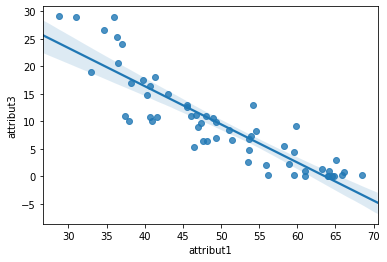

In [58]:
sns.regplot(tp1_data.loc[:,'attribut1'],tp1_data.loc[:,'attribut3'])

## Q1
a) Les relations de corrélations sont visiblement différentes pour les 3 classes.
Par exemple, pour la classe 0 le 1er et le 3e, ainsi que le 2e et 3e attributs sont fortement et négativement corrélés.
Les attributs 3 et 4 sont encore négativement corrélés, mais beausoup plus faiblement. Ces corrélations ne tiennent cependant plus pour la classe 1 et 2.

Utilisation de la méthode de réduction en composantes principales ($$\textit{PCA}$$) pour quantifier les corrélations entre les attributs pour chaque classe

In [59]:
# Scale the features data and applies PCA tranform for all classes
# Scaling
scaler = StandardScaler()
features = tp1_data.loc[: , 'attribut1':'attribut4']
labels = tp1_data.loc[: , 'classe']
scaler.fit(features)
tp1_data_scaled = scaler.transform(features)

# PCA transform
PCA_data_tp1 = PCA(n_components = features.shape[1])
PCA_data_tp1.fit(tp1_data_scaled, labels)
transf_all = PCA_data_tp1.transform(tp1_data_scaled)

# Create data frame from PCs
data_tp1_components = pd.DataFrame(PCA_data_tp1.components_, columns=list(features.columns))
tp1_components_ratios = PCA_data_tp1.explained_variance_ratio_

"""
TODO: clean up class specific PCA fit & transform as it does not work


# Scale the data and applies PCA transform for each classe
# Scaling
scaler_C0, scaler_C2, scaler_C2 = StandardScaler(), StandardScaler(), StandardScaler()

scaler.fit(tp1_data_classe_0)
scaler.fit(tp1_data_classe_1)
scaler.fit(tp1_data_classe_2)

tp1_data_scaled_C0 = scaler.transform(tp1_data_classe_0)
tp1_data_scaled_C1 = scaler.transform(tp1_data_classe_1)
tp1_data_scaled_C2 = scaler.transform(tp1_data_classe_2)

# PCA transform each classe
PCA_data_C0 = PCA(n_components =  features.shape[1])
PCA_data_C1 = PCA(n_components =  features.shape[1])
PCA_data_C2 = PCA(n_components =  features.shape[1])

PCA_data_C0.fit(tp1_data_scaled_C0)
PCA_data_C1.fit(tp1_data_scaled_C1)
PCA_data_C2.fit(tp1_data_scaled_C2)

transf_C0 = PCA_data_C0.transform(tp1_data_scaled_C0)
transf_C1 = PCA_data_C1.transform(tp1_data_scaled_C1)
transf_C2 = PCA_data_C2.transform(tp1_data_scaled_C2)

data_tp1_components = pd.DataFrame(PCA_data_C0.components_, columns=list(features.columns))
data_tp2_components = pd.DataFrame(PCA_data_C1.components_, columns=list(features.columns))
data_tp3_components = pd.DataFrame(PCA_data_C2.components_, columns=list(features.columns))

tp1_components_ratios_C0 = PCA_data_C0.explained_variance_ratio_
tp1_components_ratios_C1 = PCA_data_C1.explained_variance_ratio_
tp1_components_ratios_C2 = PCA_data_C2.explained_variance_ratio_
"""

md('Les ratios d\'influence pour chaque composante principale: {}'.format(tp1_components_ratios))
md('On peut constater que les composta {} et {} ont une influence beaucoup plus grandes sur la variance que {} et {}. On peut donc laisser tomber ces dernières')

StandardScaler(copy=True, with_mean=True, with_std=True)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

'\nTODO: clean up class specific PCA fit & transform as it does not work\n\n\n# Scale the data and applies PCA transform for each classe\n# Scaling\nscaler_C0, scaler_C2, scaler_C2 = StandardScaler(), StandardScaler(), StandardScaler()\n\nscaler.fit(tp1_data_classe_0)\nscaler.fit(tp1_data_classe_1)\nscaler.fit(tp1_data_classe_2)\n\ntp1_data_scaled_C0 = scaler.transform(tp1_data_classe_0)\ntp1_data_scaled_C1 = scaler.transform(tp1_data_classe_1)\ntp1_data_scaled_C2 = scaler.transform(tp1_data_classe_2)\n\n# PCA transform each classe\nPCA_data_C0 = PCA(n_components =  features.shape[1])\nPCA_data_C1 = PCA(n_components =  features.shape[1])\nPCA_data_C2 = PCA(n_components =  features.shape[1])\n\nPCA_data_C0.fit(tp1_data_scaled_C0)\nPCA_data_C1.fit(tp1_data_scaled_C1)\nPCA_data_C2.fit(tp1_data_scaled_C2)\n\ntransf_C0 = PCA_data_C0.transform(tp1_data_scaled_C0)\ntransf_C1 = PCA_data_C1.transform(tp1_data_scaled_C1)\ntransf_C2 = PCA_data_C2.transform(tp1_data_scaled_C2)\n\ndata_tp1_componen

Les ratios d'influence pour chaque composante principale: [0.58532927 0.24909152 0.16140426 0.00417495]

On peut constater que les composta {} et {} ont une influence beaucoup plus grandes sur la variance que {} et {}. On peut donc laisser tomber ces dernières

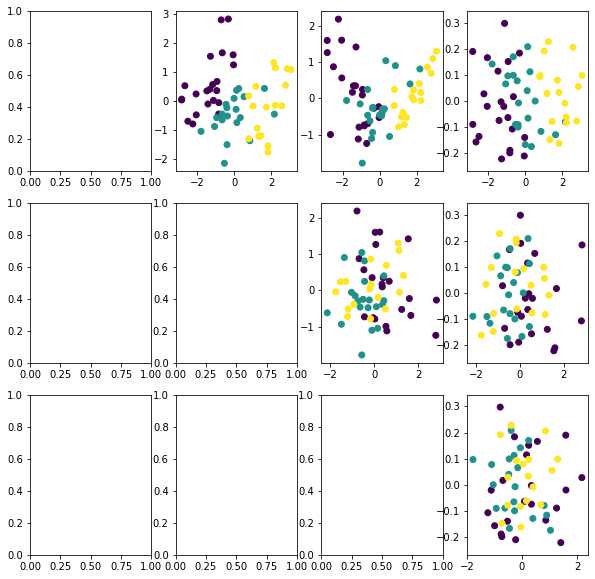

In [60]:
# Dipslay transformed features in 2D & 3D
n_features = features.shape[1]
fig, axes = plt.subplots(n_features - 1, n_features, figsize=(10,10))
k = 0
for i in range(n_features):
    for j in range(n_features):
        if(i<j):
            axes[i,j].scatter(transf_all[:, i], transf_all[:, j], c = labels)

        # axes[i,j].y_label['']
        k += 1

In [61]:
"""
TODO: clean up class-specific plotting as it does not work

plt.scatter(transf_C0[:, 0], transf_C0[:, 1], c = 'purple')
plt.scatter(transf_C0[:, 0], transf_C0[:, 2], c = 'yellow')
plt.scatter(transf_C0[:, 0], transf_C0[:, 3], c = 'green')
"""

"\nTODO: clean up class-specific plotting as it does not work\n\nplt.scatter(transf_C0[:, 0], transf_C0[:, 1], c = 'purple')\nplt.scatter(transf_C0[:, 0], transf_C0[:, 2], c = 'yellow')\nplt.scatter(transf_C0[:, 0], transf_C0[:, 3], c = 'green')\n"

"\nkmeans_2PC_C0 = KMeans(algorithm='auto', n_clusters=1)\nkmeans_2PC_C1 = KMeans(algorithm='auto', n_clusters=1)\nkmeans_2PC_C2 = KMeans(algorithm='auto', n_clusters=1)\n"

'\nkmeans_2PC_C0.fit(transf_C0.loc[:, headers[0:2]])\nkmeans_2PC_C1.fit(transf_C1.loc[:, headers[0:2]])\nkmeans_2PC_C2.fit(transf_C2.loc[:, headers[0:2]])\n'

'\ncluster_C0 = [kmeans_2PC_C0.cluster_centers_[0, 0], kmeans_2PC_C0.cluster_centers_[0, 1]] \ncluster_C1 = [kmeans_2PC_C1.cluster_centers_[0, 0], kmeans_2PC_C1.cluster_centers_[0, 1]]\ncluster_C2 = [kmeans_2PC_C2.cluster_centers_[0, 0], kmeans_2PC_C2.cluster_centers_[0, 1]]\n'

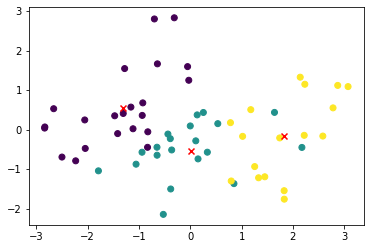

In [81]:
"""
kmeans_2PC_C0 = KMeans(algorithm='auto', n_clusters=1)
kmeans_2PC_C1 = KMeans(algorithm='auto', n_clusters=1)
kmeans_2PC_C2 = KMeans(algorithm='auto', n_clusters=1)
"""

# Calculate ranges and create data frames for each class
lim_inf = 0
lim_1 = tp1_data_classe_0.shape[0]+1
lim_2 = lim_1 + tp1_data_classe_1.shape[0]
lim_3 = lim_2 + tp1_data_classe_2.shape[0]

transf_C0 = pd.DataFrame(transf_all[lim_inf:lim_1, :], columns = headers[0:4]) 
transf_C1 = pd.DataFrame(transf_all[lim_1-1:lim_2, :], columns = headers[0:4])
transf_C2 = pd.DataFrame(transf_all[lim_2-1:, :], columns = headers[0:4])

# Process clustering for each class
"""
kmeans_2PC_C0.fit(transf_C0.loc[:, headers[0:2]])
kmeans_2PC_C1.fit(transf_C1.loc[:, headers[0:2]])
kmeans_2PC_C2.fit(transf_C2.loc[:, headers[0:2]])
"""

cluster_C0 = transf_C0.mean(axis=0)
cluster_C1 = transf_C1.mean(axis=0)
cluster_C2 = transf_C2.mean(axis=0)

"""
cluster_C0 = [kmeans_2PC_C0.cluster_centers_[0, 0], kmeans_2PC_C0.cluster_centers_[0, 1]] 
cluster_C1 = [kmeans_2PC_C1.cluster_centers_[0, 0], kmeans_2PC_C1.cluster_centers_[0, 1]]
cluster_C2 = [kmeans_2PC_C2.cluster_centers_[0, 0], kmeans_2PC_C2.cluster_centers_[0, 1]]
"""

# Plot transformed features data according to the 2 best PC
plt.scatter(transf_all[:, 0], transf_all[:, 1], c = labels)

# Plots centroids
plt.scatter(cluster_C0[0], cluster_C0[1], marker='x', c='r')
plt.scatter(cluster_C1[0], cluster_C1[1], marker='x', c='r')
plt.scatter(cluster_C2[0], cluster_C2[1], marker='x', c='r')

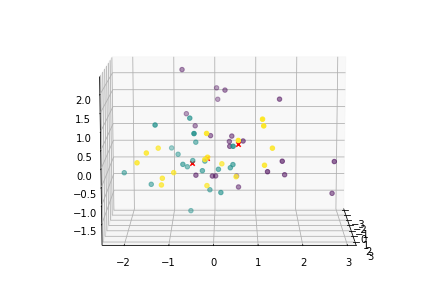

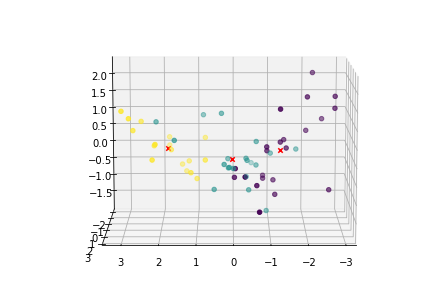

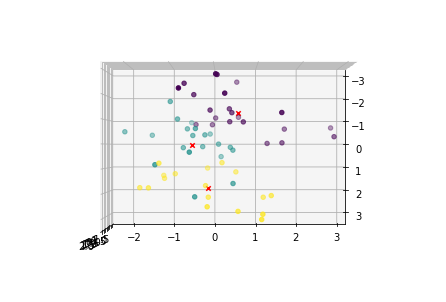

In [86]:
def Plot_PC_3D(X, Y, Z, elevation, azimut):
    fig = plt.figure()
    ax = Axes3D(fig, elev=elevation, azim=azimut)
    ax.scatter(X, Y, Z, c= labels)
    # Plots centroids
    ax.scatter(cluster_C0[0], cluster_C0[1], cluster_C0[2], marker='x', c='r')
    ax.scatter(cluster_C1[0], cluster_C1[1], cluster_C1[2], marker='x', c='r')
    ax.scatter(cluster_C2[0], cluster_C2[1], cluster_C2[2], marker='x', c='r')

Plot_PC_3D(transf_all[:, 0], transf_all[:, 1], transf_all[:, 2], 10, 0)
Plot_PC_3D(transf_all[:, 0], transf_all[:, 1], transf_all[:, 2], 10, 90)
Plot_PC_3D(transf_all[:, 0], transf_all[:, 1], transf_all[:, 2], 90, 0)
# fig_PC_12 = plt.figure()
# ax = Axes3D(fig_PC_12, elev=15, azim=0)
# ax.scatter(transf_all[:, 0], transf_all[:, 1], transf_all[:, 2], c= labels)
# 
# # Plots centroids
# ax.scatter(cluster_C0[0], cluster_C0[1], cluster_C0[2], marker='x', c='r')
# ax.scatter(cluster_C1[0], cluster_C1[1], cluster_C1[2], marker='x', c='r')
# ax.scatter(cluster_C2[0], cluster_C2[1], cluster_C2[2], marker='x', c='r')
# 
# fig_PC_13 = plt.figure()
# ax = Axes3D(fig_PC_13, elev=15, azim=90)
# ax.scatter(transf_all[:, 0], transf_all[:, 1], transf_all[:, 2], c= labels)
# 
# # Plots centroids
# ax.scatter(cluster_C0[0], cluster_C0[1], cluster_C0[2], marker='x', c='r')
# ax.scatter(cluster_C1[0], cluster_C1[1], cluster_C1[2], marker='x', c='r')
# ax.scatter(cluster_C2[0], cluster_C2[1], cluster_C2[2], marker='x', c='r')